
NSL_KDD 主程式
python 3.5
Author:daniel-code
Date:2018.04.11


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import seaborn as sns
import time


Network attack type
normal 	 13449
dos 	 9240
probe 	 2289
r2l 	 209
u2r 	 5

Total	 25192


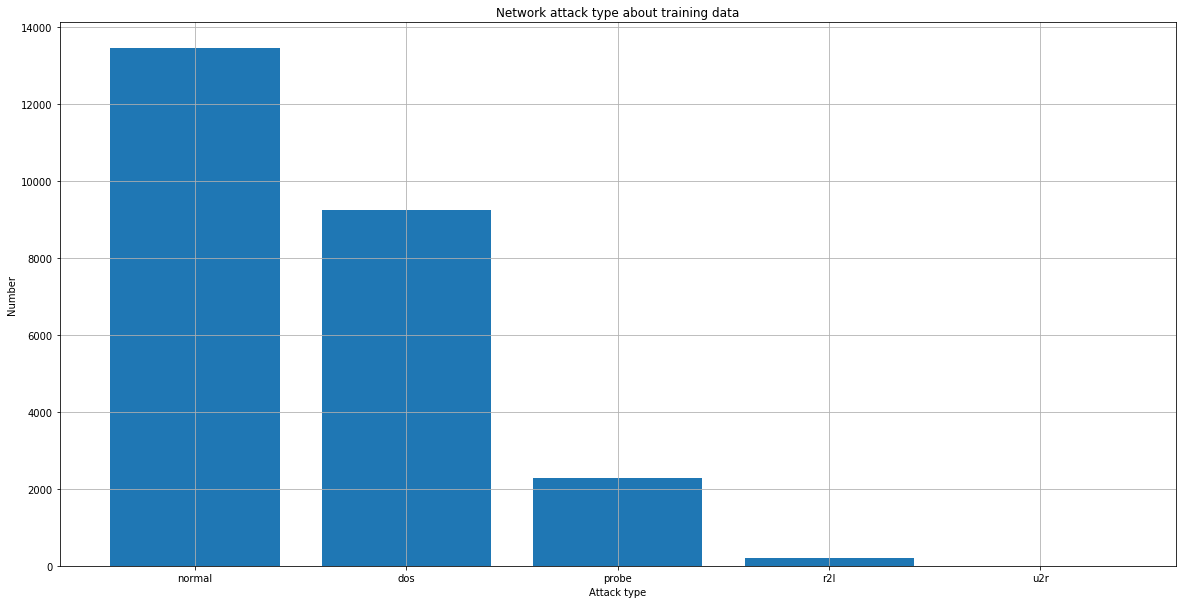

In [84]:
# read kdd date from csv


data = pd.read_csv('NSL_KDD/20_Percent Training_Set.csv', header=None)
service_list = ['aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo',
                'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http',
                'http_2784', 'http_443', 'http_8001', 'imap4', 'IRC', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link',
                'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
                'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell',
                'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i',
                'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois', 'X11', 'Z39_50']
# build attack table
attack_type = pd.read_csv('NSL_KDD/Attack Types 2.csv', names=['attack', 'type'])
attack_type_dict = attack_type.set_index('attack')['type'].to_dict()
# build training data and label
y = data[41].apply(lambda x: attack_type_dict[x] if x in attack_type_dict else 'other')
a = pd.get_dummies(data[1])
b = pd.get_dummies(data[3])
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder()
service_label = labelencoder.fit_transform(service_list).reshape(-1, 1)
onehotencoder.fit(service_label)
c = pd.DataFrame(onehotencoder.transform(labelencoder.transform(data[2]).reshape(-1, 1)).toarray()).add_prefix(
    'onehot_')
data = data.join(other=[a, b, c])
#print(data)
x = data.drop(columns=[1, 2, 3, 41])
#x = data.iloc[:, [4, 5, 11, 32]]
# statistics attack type
hist = {}
for row in y.values:
    if row in hist:
        hist[row] += 1
    else:
        hist[row] = 1
sorted_hist_list = np.array(sorted(hist.items(), key=operator.itemgetter(1), reverse=True))
print('Network attack type')
for item in sorted_hist_list:
    print(item[0], '\t', item[1])
print('\nTotal\t', len(x))
plt.figure(figsize=(20, 10))
plt.title('Network attack type about training data')
plt.bar(range(len(sorted_hist_list[:, 0])), list(map(float, sorted_hist_list[:, 1])))
plt.xticks(range(len(sorted_hist_list[:, 0])), sorted_hist_list[:, 0])
plt.xlabel('Attack type')
plt.ylabel('Number')
plt.grid(True)
plt.show()
x_train = np.array(x)
y_train = np.array(y)
# splite dataset into train and test set
#x_train, x_test, y_train, y_test = train_test_split(x[:, 4:], y, test_size=0.2, random_state=0)


Network attack type
normal 	 9710
dos 	 7478
r2l 	 2754
probe 	 2421
u2r 	 180

Total	 22543


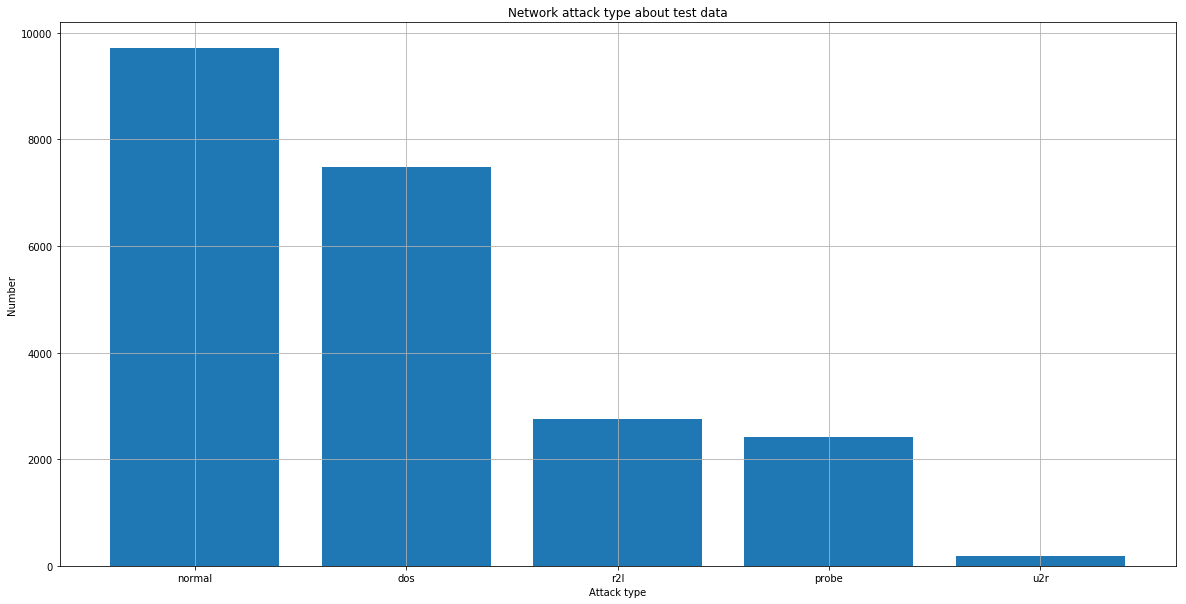

In [85]:
data = pd.read_csv('NSL_KDD/KDDTest+.csv', header=None)

# build attack table
#attack_type = pd.read_csv('NSL_KDD/Attack Types.csv', names=['attack', 'type'])
#attack_type_dict = attack_type.set_index('attack')['type'].to_dict()

# build training data and label
y = data[41].apply(lambda x: attack_type_dict[x] if x in attack_type_dict else 'other')
a = pd.get_dummies(data[1])
b = pd.get_dummies(data[3])
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder()
service_label = labelencoder.fit_transform(service_list).reshape(-1, 1)
onehotencoder.fit(service_label)
c = pd.DataFrame(onehotencoder.transform(labelencoder.transform(data[2]).reshape(-1, 1)).toarray()).add_prefix(
    'onehot_')
data = data.join(other=[a, b, c])
#print(data)
x = data.drop(columns=[1, 2, 3, 41])
#x = data.iloc[:, [4, 5, 11, 32]]
hist = {}
for row in y.values:
    if row in hist:
        hist[row] += 1
    else:
        hist[row] = 1
sorted_hist_list = np.array(sorted(hist.items(), key=operator.itemgetter(1), reverse=True))
print('Network attack type')
for item in sorted_hist_list:
    print(item[0], '\t', item[1])
print('\nTotal\t', len(x))
plt.figure(figsize=(20, 10))
plt.title('Network attack type about test data')
plt.bar(range(len(sorted_hist_list[:,0])),list(map(float,sorted_hist_list[:, 1])))
plt.xticks(range(len(sorted_hist_list[:,0])),sorted_hist_list[:, 0])
plt.xlabel('Attack type')
plt.ylabel('Number')
plt.grid(True)
plt.show()
x_test = np.array(x)
y_test = np.array(y)

In [87]:
# build model
model = svm.SVC()
print('---START TRAINING---')
start_time = time.time()
model.fit(X=x_train, y=y_train)
print('---END TRAIN---')
print('Time = ', time.time() - start_time)

---START TRAINING---


---END TRAIN---
Time =  509.17444920539856


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        dos       0.95      0.67      0.79      7478
     normal       0.61      0.99      0.76      9710
      probe       0.79      0.48      0.60      2421
        r2l       1.00      0.00      0.00      2754
        u2r       0.00      0.00      0.00       180

avg / total       0.78      0.70      0.65     22543



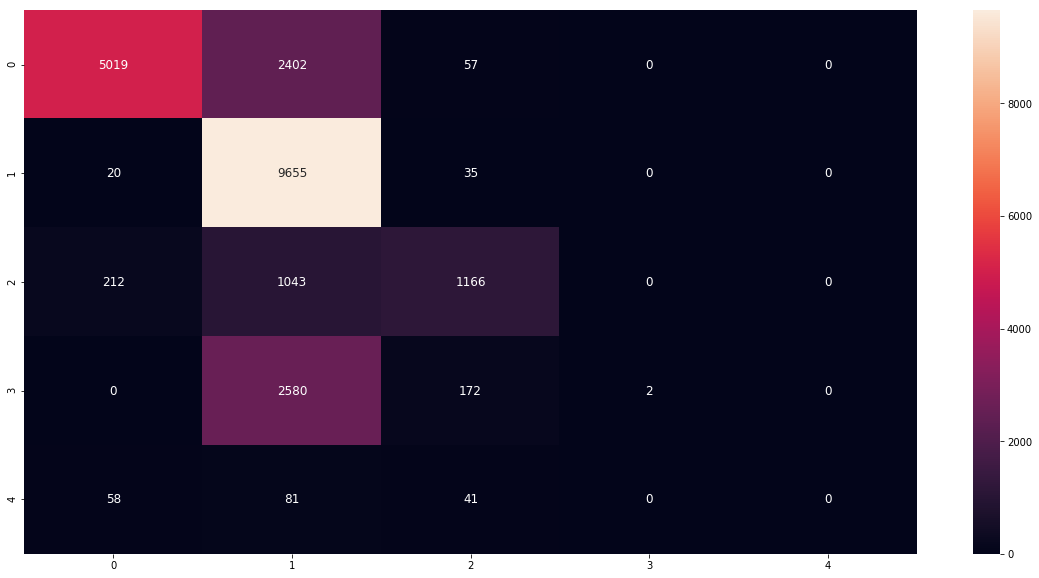

In [87]:
# predict
y_pred=model.predict(x_test)
score = model.score(X=x_test, y=y_test)
print(classification_report(y_test,y_pred))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred,labels=["dos","normal","probe","r2l","u2r"])
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,annot_kws={"size": 12}, ax = ax,fmt="d") #annot=True to annotate cells
plt.show()

In [ ]:

'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'IRC', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois', 'X11', 'Z39_50'
